In [105]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

import pandas as pd

In [109]:
data = np.array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

$p(data|p) = \prod_i{ p^i \cdot (1-p)^{(1-i)}}$

$p(p|data) = \frac{p(data|p)\cdot p(p)}{p(data)}$

In [112]:
def likelihood(data, p):
    prob = p**(data) * (1 - p)**(1-data)
    return np.prod(prob, axis = 1)

In [113]:
def prior(p):
    return 1

In [114]:
def evidence(data):
    p = np.linspace(0, 1, 1000).reshape(-1, 1)
    step = 1/1000
    lik = likelihood(data, p)
    pri = prior(p)
    return (lik*pri).sum() * step #==(lik*pri).mean()

In [115]:
def posterior(data, p):
    return (likelihood(data, p)*prior(p))/evidence(data)

In [116]:
p_s = np.linspace(0, 1, 1000).reshape(-1, 1)

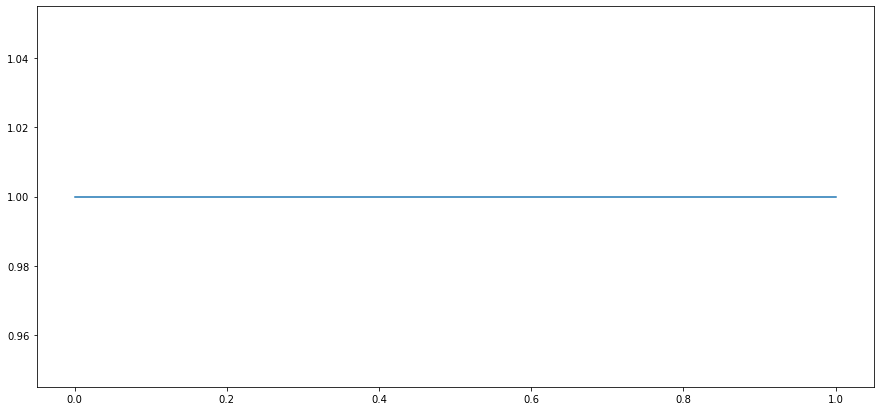

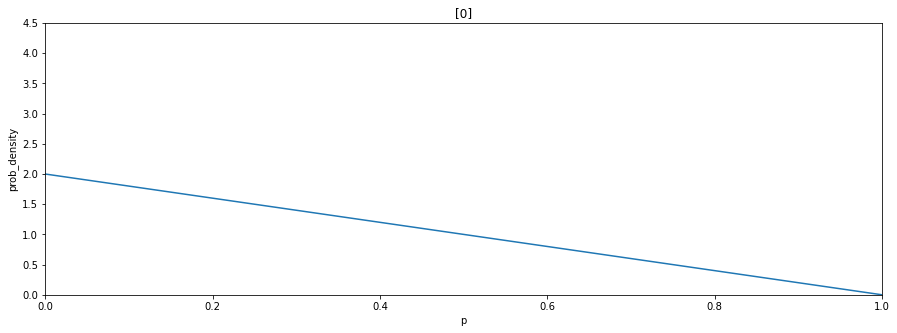

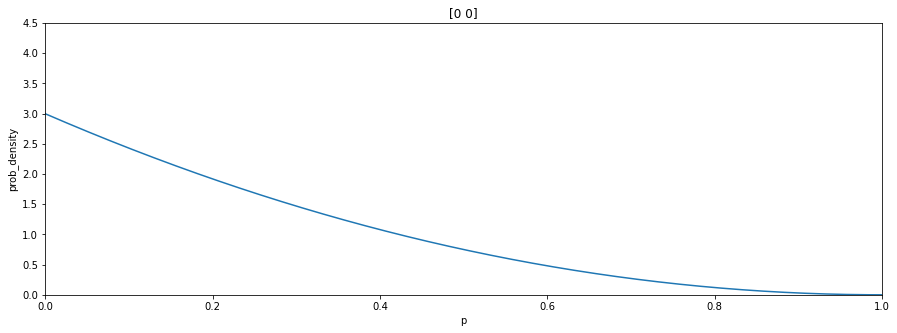

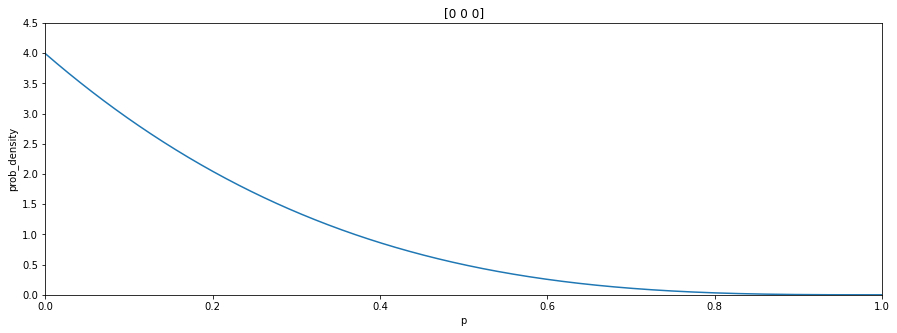

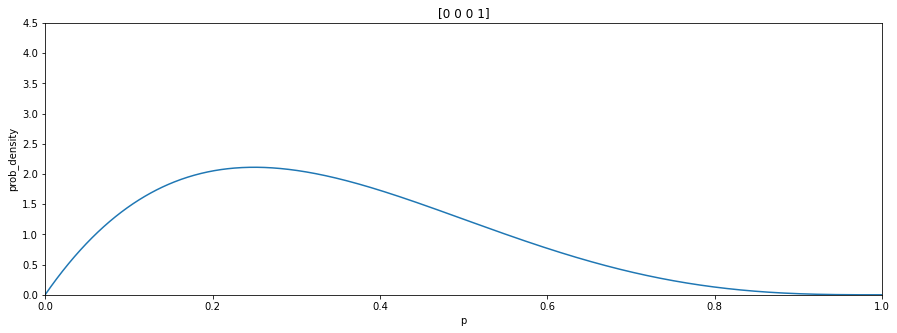

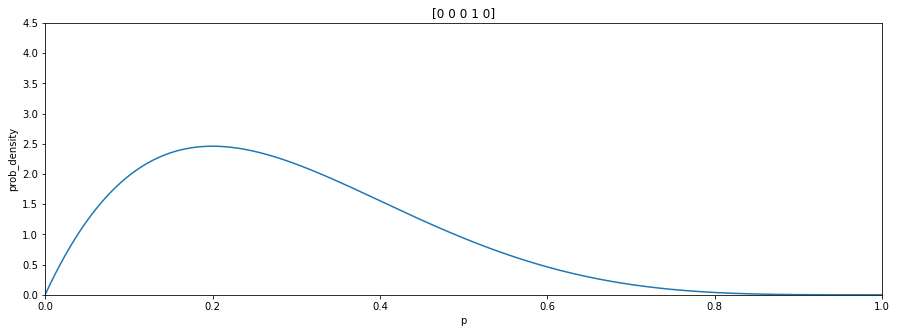

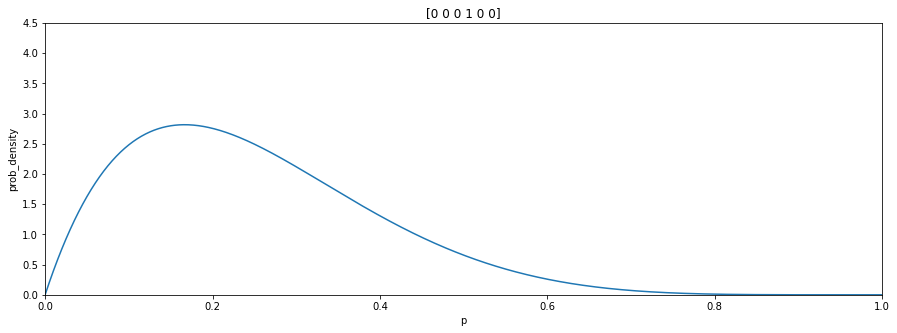

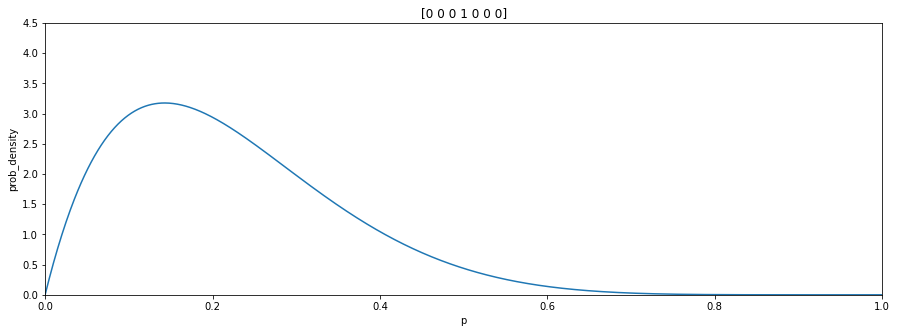

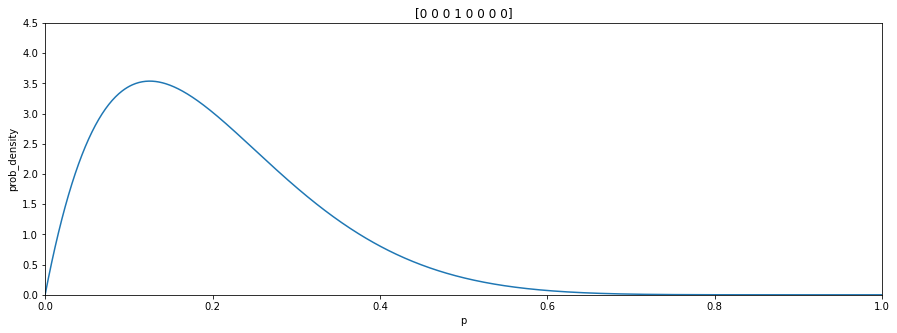

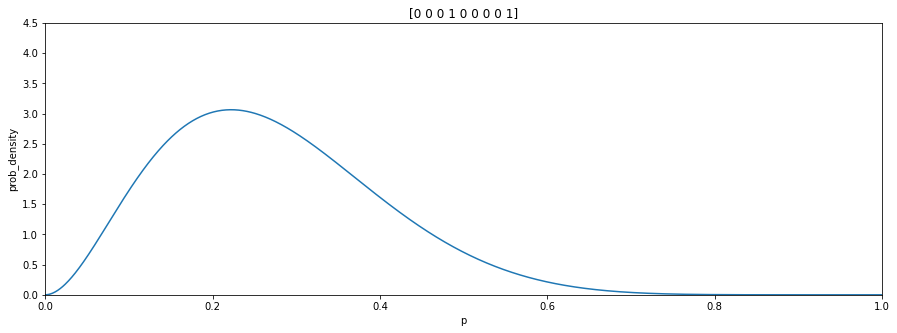

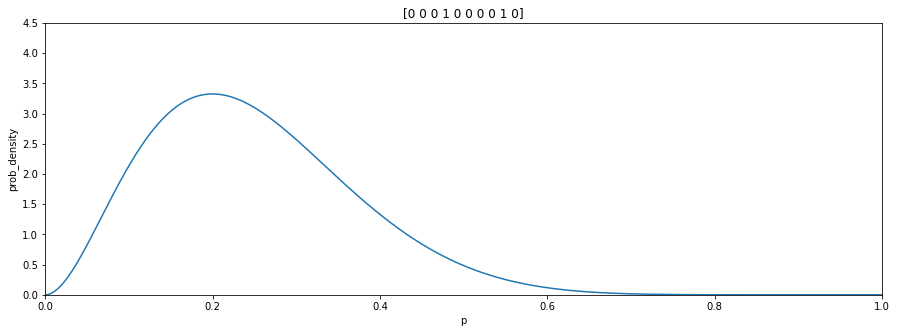

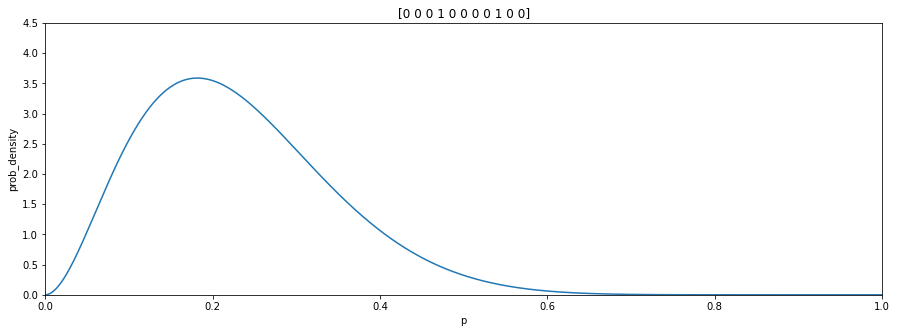

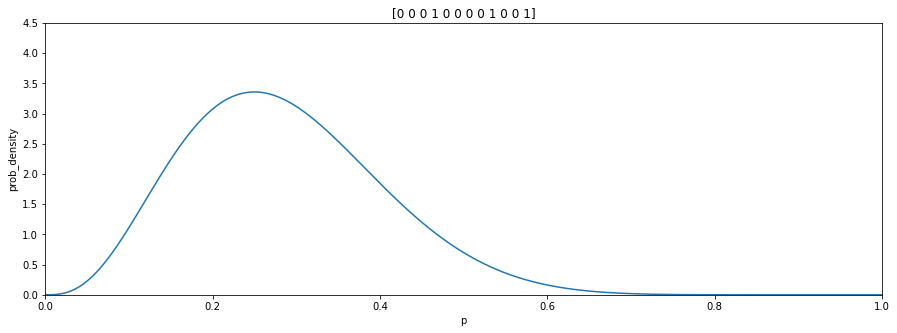

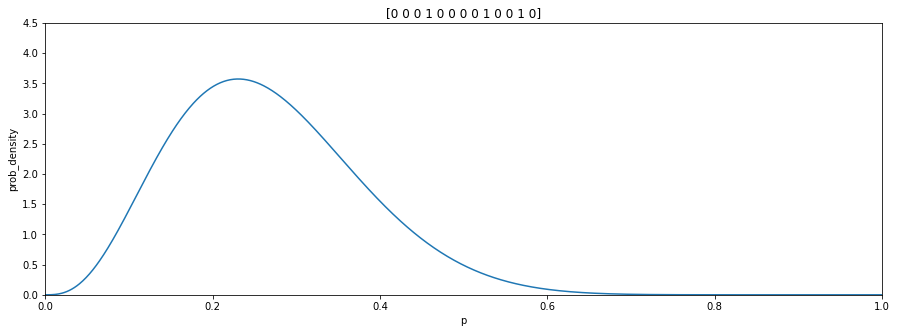

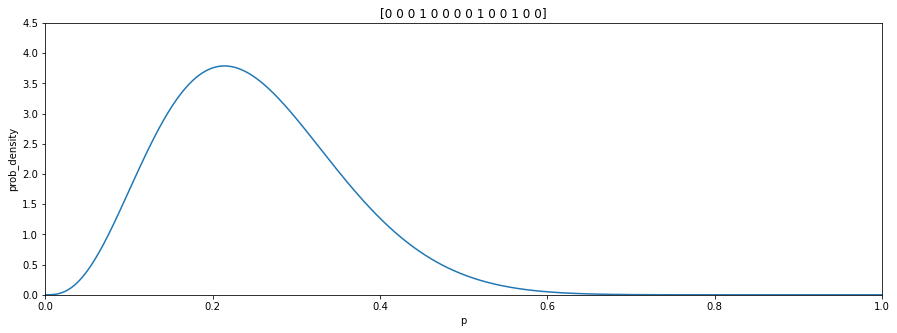

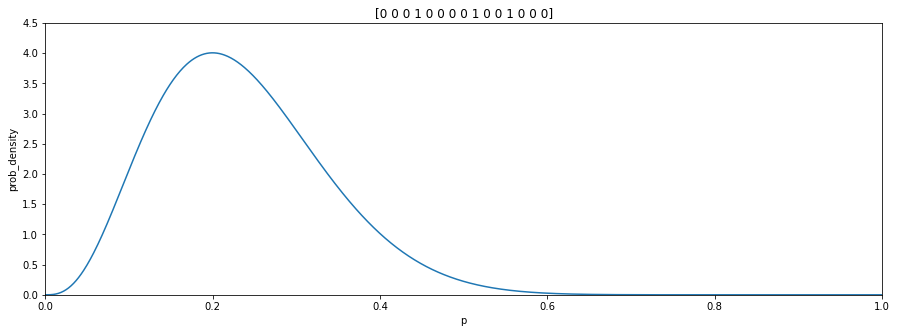

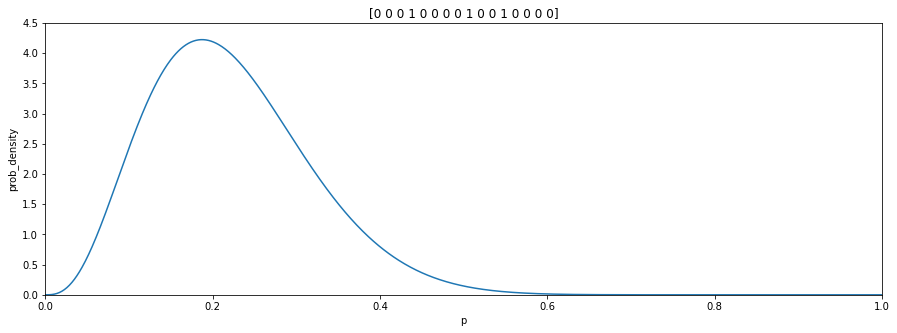

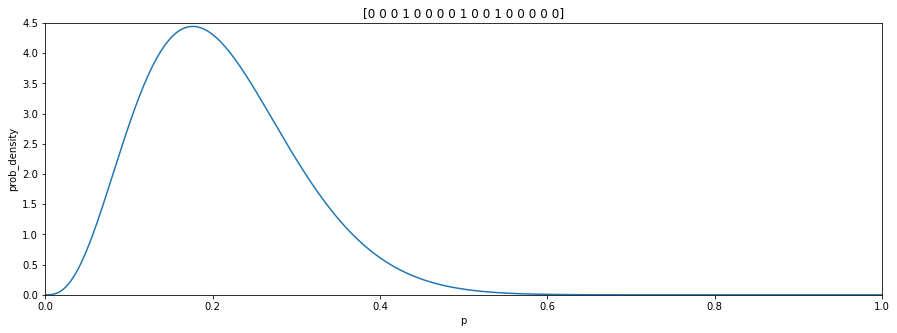

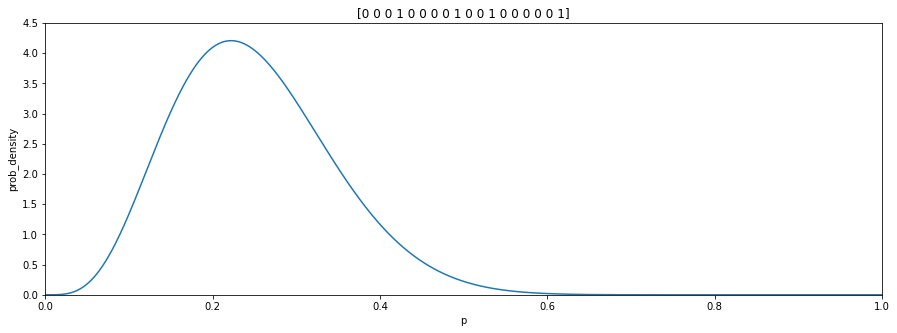

In [117]:
fig = plt.figure(figsize = [15, 7])
plt.plot(p_s, np.ones(len(p_s)))
plt.show()
for i in range(len(data)):
    df = data[:(i+1)]
    post = posterior(df, p_s)
    fig = plt.figure(figsize = [15, 5])
    plt.plot(p_s, post)
    plt.xlabel("p")
    plt.title(str(df))
    plt.ylabel("prob_density")
    plt.ylim(0, 4.5)
    plt.xlim(0, 1)
    plt.show()

In [119]:
post = posterior(data, p_s)

In [120]:
lik = likelihood(data, p_s)

In [123]:
p_mean = (p_s[:, 0]*post).mean()
p_mean

0.24999999999999892

In [122]:
p_var = (post * (p_s[:, 0] - p_mean)**2).mean()
p_sd = np.sqrt(p_var)
p_sd

0.09449111825230834

In [82]:
#Pymc3

In [83]:
with pm.Model() as model:
    p = pm.Uniform("p", 0, 1)
    likelihood = pm.Bernoulli("likelihood", p = p, observed = data)

In [85]:
with model:
    trace = pm.sample()

/Users/hynekjakes/opt/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 38 seconds.


/Users/hynekjakes/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

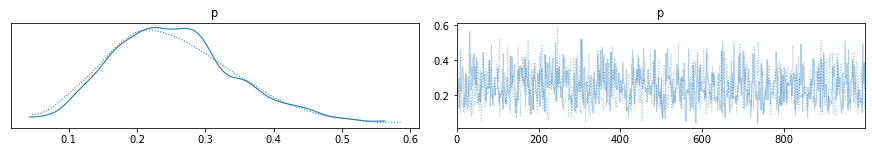

In [86]:
az.plot_trace(trace)

In [87]:
az.summary(trace)

/Users/hynekjakes/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.252,0.091,0.089,0.421,0.003,0.002,893.0,1409.0,1.0


/Users/hynekjakes/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

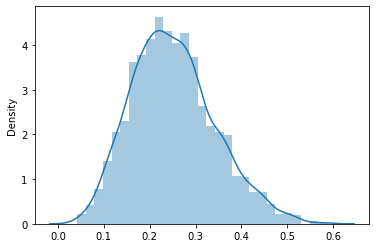

In [88]:
sns.distplot(trace["p"])